In [2]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split
import seaborn_figure_settings

In [3]:
save_dpath = 'figures'
import os
os.makedirs(save_dpath, exist_ok=True)

In [4]:

HCOLOR = '#E26A2C'
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

ccnpalette = [PCOLOR, HCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'DON', 'RDON', 'DIN']
cccpalette = [PCOLOR, HCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [5]:
mpalette = sns.color_palette('Accent', n_colors=8).as_hex()
#mpalette = [mpalette[0]] + mpalette[4:7]

AXENIC_COLOR = '#47B07B' # axenic (green ) 
COCULTURE = '#7D7D7D' # co-culture (grey) #7D7D7D
CC_COLOR = '#1B73D3'
#9479b9
PRO_COLOR = 'MediumSeaGreen'
ALT_COLOR = 'Gold'
mpalette = [PRO_COLOR,ALT_COLOR, AXENIC_COLOR, COCULTURE, CC_COLOR ]
torder = ['med4', 'co-culture']
tpal = [PCOLOR_light, PRO_COLOR]
forder = ['med4 (AX)', 'med4 (CC)', '1A3 (CC)', '1A3 (AX)']
fpal = [PCOLOR_light, PRO_COLOR, HCOLOR, HCOLOR_light,  ]

sns.color_palette(fpal)

[(0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (0.23529411764705882, 0.7019607843137254, 0.44313725490196076),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.9921568627450981, 0.6509803921568628, 0.36470588235294116)]

In [6]:
sorder = ['P0A', 'P0B', 'P0C', 'A0A', 'A0B', 'A0C', 'C0A', 'C0B', 'C0C',
       'P1A', 'P1B', 'P1C', 'A1A', 'A1B', 'A1C', 'C1A', 'C1B', 'C1C',
       'P2A', 'P2B', 'P2C', 'A2A', 'A2B', 'A2C', 'C2A', 'C2B', 'C2C',
       'P3A', 'P3B', 'P3C', 'A3A', 'A3B', 'A3C', 'C3A', 'C3B', 'C3C']



In [7]:
data_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='FL').T.reset_index(drop=True)


In [8]:
data2_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='TP').T.reset_index(drop=True)


In [9]:
data3_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='transfer p2').T.reset_index(drop=True)
data4_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='transfer c3').T.reset_index(drop=True)
data5_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='transfer c4').T.reset_index(drop=True)
data7_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='transfer c5').T.reset_index(drop=True)
data6_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='MED4 REPEAT', skiprows=2).T.reset_index(drop=True)


In [10]:
mdf1 = pd.melt(data_df, id_vars='day', var_name='Sample', value_name='FL')
mdf2 = pd.melt(data2_df, id_vars='day', var_name='Sample', value_name='FL')
mdf3 = pd.melt(data3_df, id_vars='day', var_name='Sample', value_name='FL')
mdf4 = pd.melt(data4_df, id_vars='day', var_name='Sample', value_name='FL')
mdf5 = pd.melt(data5_df, id_vars='day', var_name='Sample', value_name='FL')
mdf6 = pd.melt(data6_df, id_vars='day', var_name='Sample', value_name='FL')
mdf7 = pd.melt(data7_df, id_vars='day', var_name='Sample', value_name='FL')


In [11]:
df = pd.concat([mdf1, mdf2, mdf6])
trans_df = pd.concat([mdf3, mdf4, mdf5, mdf7])

In [12]:
d = df.Sample.str.split('', expand=True)
df['treatment'] = d[1].map({'P': 'med4', 'A': '1A3', 'C': 'co-culture'})
df['timepoint'] = d[2]
df['replicate'] = d[3]

In [13]:
d = trans_df.Sample.str.split('', expand=True)
trans_df['treatment'] = d[1].map({'P': 'med4', 'A': '1A3', 'C': 'co-culture'})
trans_df['timepoint'] = d[2].map({'0': '11', '3': '31', '4': '60', '5': '88' })
trans_df['replicate'] = d[3]
trans_df['name'] = trans_df['treatment'] + ' @' + trans_df['timepoint'] + ' days'


In [14]:
df['omics'] = False
df.loc[df.timepoint.isin(['3','4','6']), 'omics'] = True
df.loc[df.timepoint.isin(['1','2']) & df.treatment.isin(['1A3', 'co-culture']), 'omics'] = True
df.loc[(df.timepoint  == '7') & (df.day >13.5), 'omics'] = True



In [15]:
df.columns

Index(['day', 'Sample', 'FL', 'treatment', 'timepoint', 'replicate', 'omics'], dtype='object')

In [16]:
df = df.groupby(['day', 'Sample', 'treatment', 'timepoint', 'replicate', 'omics'])['FL'].mean().reset_index()

In [17]:
NH4_df = pd.read_excel('Osnat_CC1A3_N analysis.xlsx')
NH4_df = NH4_df[['condition', 'Day', 'NH4']].copy()

In [18]:
MPN_df = pd.read_csv('../MPN/data/CC1A3_MPN_results_R.csv')
MPN_df

,Sample,day,MPN,MPN_adj,variance,var_log,LB,UB,RI
0,A0A,4,1.151293e+06,5.490492e+05,1.012500e+06,0.763877,2.076036e+05,6.384641e+06,1
1,A0B,4,3.070802e+05,1.372719e+05,8.329091e+04,0.883271,4.867114e+04,1.937458e+06,1
2,A0C,4,3.070802e+05,1.372719e+05,8.329091e+04,0.883271,4.867114e+04,1.937458e+06,1
3,C0A,4,1.151293e+07,5.490489e+06,1.012501e+08,0.763878,2.076036e+06,6.384645e+07,1
4,C0B,4,3.070803e+06,1.372720e+06,8.329093e+06,0.883271,4.867114e+05,1.937458e+07,1
5,C0C,4,1.151293e+07,5.490489e+06,1.012501e+08,0.763878,2.076036e+06,6.384645e+07,1
6,CTRL,4,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,2.246799e+01,1
7,P0A,4,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,6.740398e+01,1
8,P0B,4,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,6.740398e+01,1
9,P0C,4,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,6.740398e+01,1


In [19]:
MPN_df['day'] = 88
MPN_df['condition']  = MPN_df.Sample.str.split('', expand=True)[1]
MPN_df.loc[MPN_df['Sample'] == 'CTRL', 'condition'] = 'CTRL'
MPN_df['log10(cells/ml)'] = np.log10(MPN_df['MPN_adj']+1)

(0.04, 1)

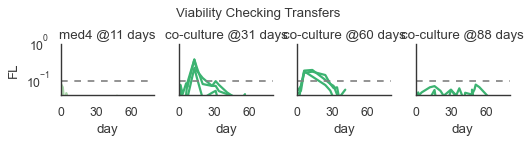

In [20]:

g = sns.relplot(data=trans_df, # .loc[trans_df.name != 'med4 @11'],
            x='day', y='FL', lw=2,
            #style='replicate', markers=True, 
            estimator=None, units='Sample',
            hue='treatment', #markersize=5,
                hue_order=torder, palette=tpal,
           kind='line', #ci='sd'
            #height=10, 
                height=1.7,
            #aspect=1,
            col='name', legend=False
            
           ).set_titles('{col_name}')
for ax in g.axes.flat:
    ax.axhline(1e-1, color='grey', linestyle='--')   
g.set(xticks=[0,30,60])
plt.suptitle('Viability Checking Transfers', y=1.05)
plt.yscale('log')
plt.ylim(0.04, 1)

# FCM results

In [21]:
os.listdir()

['.ipynb_checkpoints',
 'cc1a3 day 60 FCM.xlsx',
 'cc1A3 N budget.ipynb',
 'cc1A3 notebook.ipynb',
 'CC1A3_N_budget.xlsx',
 'data',
 'figures',
 'Osnat_CC1A3_N analysis.xlsx',
 'seaborn_figure_settings.py',
 '__pycache__']

In [22]:
problematic_samples = ['P0A-d33-sybr', 'A0B-d15-sybr', 'C0C-d15-sybr', 'P0A-d33', 'C0C-d15', 'P7A-d6-sybr', 'P7A-d6']


In [23]:
fcm_nosybr = pd.read_csv(os.path.join('data', 'CC1A3_FCM_PRO_nosybr.csv'))
fcm_sybr = pd.read_csv(os.path.join('data', 'CC1A3_FCM_sybr.csv'))

In [24]:
fcm_nosybr.head()

,sample_id,condition,bottle,replicate,patient_id,Day,batch,day_bin,PRO_nosybr,events
0,C0A-d10,C,0,A,C0A,10,25_1_specimen2,"(5,10]",1.530643e+07,5120
1,C0A-d11,C,0,A,C0A,11,25_1_specimen2,"(10,20]",3.311211e+07,11076
2,C0A-d13,C,0,A,C0A,13,25_1_specimen2,"(10,20]",4.237369e+07,14174
3,C0A-d14,C,0,A,C0A,14,25_1_specimen3,"(10,20]",4.435268e+07,15091
4,C0A-d15,C,0,A,C0A,15,25_1_specimen3,"(10,20]",6.830272e+07,23240


In [25]:
fcm_nosybr.columns

Index(['sample_id', 'condition', 'bottle', 'replicate', 'patient_id', 'Day',
       'batch', 'day_bin', 'PRO_nosybr', 'events'],
      dtype='object')

In [26]:
d1 = fcm_nosybr.loc[fcm_nosybr.condition.isin(['P', 'C']), [
    'sample_id', 'condition', 'bottle',
    'replicate', 'patient_id', 'Day',
    'PRO_nosybr', 'events', ]
              ].rename(columns={'PRO_nosybr': 'cells/ml', 'bottle': 'timepoint',
                               'patient_id': 'Sample'
                               })
d1['Strain'] = 'med4'
d1['group'] = d1.condition.map({'P': 'med4 (AX)', 'C': 'med4 (CC)'})

In [27]:
d2 = fcm_sybr.loc[fcm_sybr.cluster_id.isin(['ALT']) & fcm_sybr.condition.isin(['A', 'C']), [
     'sample_id', 'condition', 'bottle',
       'replicate', 'patient_id', 'Day',
        'cells', 'Freq', ]
              ].rename(columns={'cells': 'cells/ml', 'Freq' : 'events', 'bottle': 'timepoint',
                               'patient_id': 'Sample'
                               })           
d2['Strain'] = 'HOT1A3'
d2['group'] = d2.condition.map({'A': '1A3 (AX)', 'C': '1A3 (CC)'})


In [28]:
d3 = fcm_sybr.loc[fcm_sybr.cluster_id.isin(['PROhigh']) #& fcm_sybr.condition.isin(['A', 'C'])
                  , [
     'sample_id', 'condition', 'bottle',
       'replicate', 'patient_id', 'Day',
        'cells', 'Freq', ]
              ].rename(columns={'cells': 'cells/ml', 'Freq' : 'events', 'bottle': 'timepoint',
                               'patient_id': 'Sample'
                               })           
d3['Strain'] = 'PROhigh'
d3['group'] = d3.condition.map({'A': 'PROhigh (A)', 'C': 'PROhigh (C)', 'P' : 'PROhigh (P)'})


In [29]:
fcm_df = pd.concat([d1, d2])

In [30]:
fcm_df['omics'] = False
fcm_df.loc[fcm_df.timepoint.isin([3,4,5,6]), 'omics'] = True
fcm_df.loc[fcm_df.timepoint.isin([1,2]) & fcm_df.condition.isin(['A', 'C']), 'omics'] = True
fcm_df.loc[(fcm_df.timepoint  == 7) & (fcm_df.Day >13.5), 'omics'] = True
fcm_df.loc[(fcm_df.timepoint  == 0) & (fcm_df.Day >88), 'omics'] = True



In [31]:
fcm_df = fcm_df.reset_index()

Text(0.5, 1.0, 'CC1A3 Culture FCM cell counts')

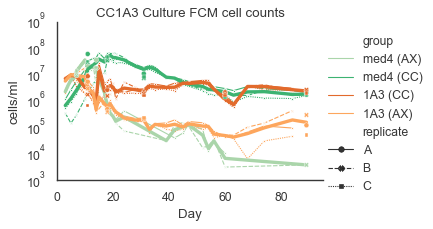

In [32]:

sns.relplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7, 5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='cells/ml', 
            style='replicate', 
            markers=True, 
            estimator=None, units='Sample',
            hue='group', markersize=2,
            #size='omics',
            hue_order=forder, palette=fpal,
            lw=1,
           kind='line', errorbar='sd',
            height=3, aspect=1.4,
            #legend=False
           )
sns.lineplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7,5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='cells/ml', 
            hue='group', markersize=2,
            # estimator=None,
            hue_order=forder, palette=fpal, errorbar=None,
            lw=3,
            legend=False
           )
sns.scatterplot(data=fcm_df.loc[fcm_df.omics.isin([True])& (fcm_df.events > 40)]
            , x='Day', y='cells/ml', 
            hue_order=forder, palette=fpal,
            style='replicate', 
            hue='group', s=20,
                zorder=20,
                legend=False
           )

plt.xlim(0,95)
#plt.ylim(0,5)

plt.yscale('log')

plt.title('CC1A3 Culture FCM cell counts')

In [33]:
fcm_df

,index,sample_id,condition,timepoint,replicate,Sample,Day,cells/ml,events,Strain,group,omics
0,0,C0A-d10,C,0,A,C0A,10,1.530643e+07,5120,med4,med4 (CC),False
1,1,C0A-d11,C,0,A,C0A,11,3.311211e+07,11076,med4,med4 (CC),False
2,2,C0A-d13,C,0,A,C0A,13,4.237369e+07,14174,med4,med4 (CC),False
3,3,C0A-d14,C,0,A,C0A,14,4.435268e+07,15091,med4,med4 (CC),False
4,4,C0A-d15,C,0,A,C0A,15,6.830272e+07,23240,med4,med4 (CC),False
...,...,...,...,...,...,...,...,...,...,...,...,...
432,1214,C4B-d60-sybr,C,4,B,C4B,60,1.853748e+06,507,HOT1A3,1A3 (CC),True
433,1220,C4C-d60-sybr,C,4,C,C4C,60,1.659963e+06,454,HOT1A3,1A3 (CC),True
434,1226,C5A-d89-sybr,C,5,A,C5A,89,2.548926e+06,534,HOT1A3,1A3 (CC),True
435,1230,C5B-d89-sybr,C,5,B,C5B,89,2.739857e+06,574,HOT1A3,1A3 (CC),True


In [34]:
fpal

['#aad5aa', 'MediumSeaGreen', '#E26A2C', '#FDA65D']

C:\Users\oweisberg\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


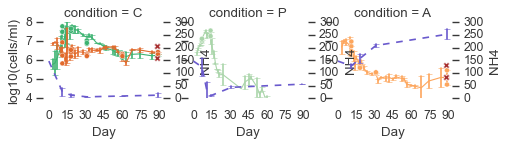

In [35]:
fcm_df['log10(cells/ml)'] = np.log10(fcm_df['cells/ml'])
g = sns.relplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7, 5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='log10(cells/ml)', 
            #style='replicate', 
            #markers=True, 
            #estimator=None, units='Sample',
            hue='group', #markersize=5,
            #size='omics',
            err_style='bars',
            col='condition',
            hue_order=forder, palette=fpal,
            lw=1,
           kind='line', errorbar='sd',
            height=2, aspect=1,
            legend=False
           ).set(xticks=[0,15,30,45,60,75,90], ylim=[4,8]) #.set_titles('')


secondary_axes = list()
ax2prev=None
for col_val, ax in g.axes_dict.items():
    ax2 = ax.twinx()
    if ax2prev is not None:
        ax2.sharey(ax2prev)
    ax2prev = ax2
        
    secondary_axes +=[ax2]
    sns.lineplot(
        data=NH4_df.loc[NH4_df.condition.isin([col_val])],
        x='Day', y='NH4', ls='--', errorbar='sd',
            err_style='bars', color='#6A5ACD', #lw=1.5, 
        zorder=100,
    )
ax2.set(ylim=(0,300))
g.set(yticks=(4,5,6,7,8))
sns.despine(left=True, bottom=True)

for col_val, ax in g.axes_dict.items():
    sns.scatterplot(data=fcm_df.loc[fcm_df.omics.isin([True])&# (fcm_df.events > 40) & 
                                    fcm_df.condition.isin([col_val])]
                , x='Day', y='log10(cells/ml)', 
                hue_order=forder, palette=fpal,
                #style='replicate', 
                hue='group', s=20, # marker='X',# lw=0.5,
                    zorder=20,
                    legend=False, ax=ax,
               )
    sns.scatterplot(data=MPN_df.loc[MPN_df.condition.isin([col_val])],
                x='day', y='log10(cells/ml)', 
                #style='replicate', 
                color='brown', s=30,  marker='X',# lw=0.5,
                    zorder=20,
                    legend=False, ax=ax,
               )


save_fpath = os.path.join(save_dpath, f'fig_cellml_nh4.svg')
plt.savefig(save_fpath)


C:\Users\oweisberg\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


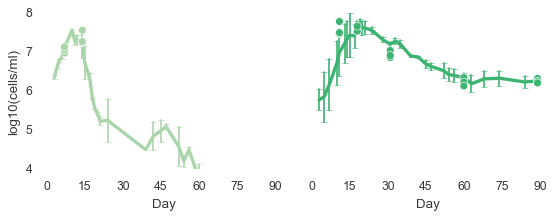

In [40]:
fcm_df['log10(cells/ml)'] = np.log10(fcm_df['cells/ml'])
g = sns.relplot(
    data=fcm_df.loc[
        fcm_df.timepoint.isin([0, 7, 5]) & 
        (fcm_df.events > 40) & 
        (~fcm_df.sample_id.isin(problematic_samples)) &
        (fcm_df.Strain.isin(['med4']))
                           ]
            , x='Day', y='log10(cells/ml)', 
            #style='replicate', 
            #markers=True, 
            #estimator=None, units='Sample',
            hue='group', #markersize=5,
            #size='omics',
            err_style='bars',
            col='condition', col_order=['P', 'C'],
            hue_order=forder, palette=fpal,
            lw=3,
           kind='line', errorbar='sd',
            height=3, aspect=1.2,
            legend=False
           ).set(xticks=[0,15,30,45,60,75,90], ylim=[4,8]).set_titles('')


g.set(yticks=(4,5,6,7,8))
sns.despine(left=True, bottom=True)

for col_val, ax in g.axes_dict.items():
    sns.scatterplot(
        data=fcm_df.loc[
        fcm_df.omics.isin([True])&# (fcm_df.events > 40) & 
        fcm_df.condition.isin([col_val]) & 
        (fcm_df.Strain.isin(['med4']))
        ]
                , x='Day', y='log10(cells/ml)', 
                hue_order=forder, palette=fpal,
                #style='replicate', 
                hue='group', s=50, # marker='X',# lw=0.5,
                    zorder=20,
                    legend=False, ax=ax,
               )


save_fpath = os.path.join(save_dpath, f'fig_cellml_med4only.svg')
plt.savefig(save_fpath)


C:\Users\oweisberg\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


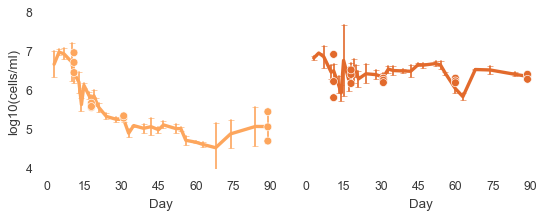

In [38]:
fcm_df['log10(cells/ml)'] = np.log10(fcm_df['cells/ml'])
g = sns.relplot(
    data=fcm_df.loc[
        fcm_df.timepoint.isin([0, 7, 5]) & 
        (fcm_df.events > 40) & 
        (~fcm_df.sample_id.isin(problematic_samples)) &
        (fcm_df.Strain.isin(['HOT1A3']))
                           ]
            , x='Day', y='log10(cells/ml)', 
            #style='replicate', 
            #markers=True, 
            #estimator=None, units='Sample',
            hue='group', #markersize=5,
            #size='omics',
            err_style='bars',
            col='condition',
            hue_order=forder, palette=fpal,
            lw=3,
           kind='line', errorbar='sd',
            height=3, aspect=1.2,
            legend=False
           ).set(xticks=[0,15,30,45,60,75,90], ylim=[4,8]).set_titles('')


g.set(yticks=(4,5,6,7,8))
sns.despine(left=True, bottom=True)

for col_val, ax in g.axes_dict.items():
    sns.scatterplot(
        data=fcm_df.loc[
        fcm_df.omics.isin([True])&# (fcm_df.events > 40) & 
        fcm_df.condition.isin([col_val]) & 
        (fcm_df.Strain.isin(['HOT1A3']))
        ]
                , x='Day', y='log10(cells/ml)', 
                hue_order=forder, palette=fpal,
                #style='replicate', 
                hue='group', s=50, # marker='X',# lw=0.5,
                    zorder=20,
                    legend=False, ax=ax,
               )


save_fpath = os.path.join(save_dpath, f'fig_cellml_1a3only.svg')
plt.savefig(save_fpath)


C:\Users\Osnat\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


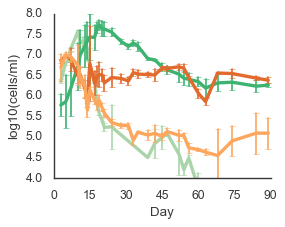

In [33]:
fcm_df['log10(cells/ml)'] = np.log10(fcm_df['cells/ml'])
g = sns.relplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7, 5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='log10(cells/ml)', 
            #style='replicate', 
            #markers=True, 
            #estimator=None, units='Sample',
            hue='group', #markersize=5,
            #size='omics',
            err_style='bars',
            #col='Strain',
            hue_order=forder, palette=fpal,
            lw=3,
           kind='line', errorbar='sd',
            height=3, aspect=1.2,
            legend=False
           ).set(xticks=[0,15,30,45,60,75,90], ylim=[4,8]).set_titles('')



C:\Users\Osnat\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


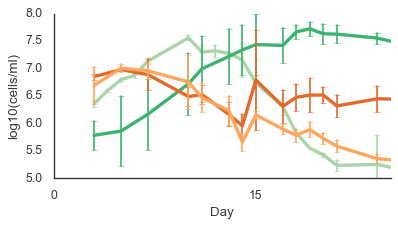

In [34]:
fcm_df['log10(cells/ml)'] = np.log10(fcm_df['cells/ml'])
g = sns.relplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7, 5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='log10(cells/ml)', 
            #style='replicate', 
            #markers=True, 
            #estimator=None, units='Sample',
            hue='group', #markersize=5,
            #size='omics',
            err_style='bars',
            #col='Strain',
            hue_order=forder, palette=fpal,
            lw=3,
           kind='line', errorbar='sd',
            height=3, aspect=1.7,
            legend=False
           ).set(xticks=[0,15,30,45,60,75,90], ylim=[5,8]).set_titles('')
g.set(xlim=(0,25))


C:\Users\Osnat\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


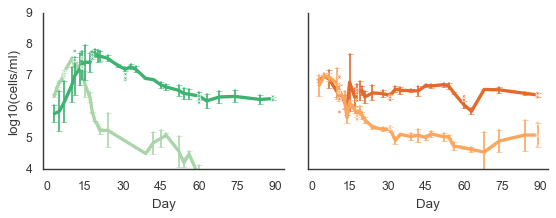

In [35]:
fcm_df['log10(cells/ml)'] = np.log10(fcm_df['cells/ml'])
g = sns.relplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7, 5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='log10(cells/ml)', 
            #style='replicate', 
            #markers=True, 
            #estimator=None, units='Sample',
            hue='group', #markersize=5,
            #size='omics',
            err_style='bars',
            col='Strain',
            hue_order=forder, palette=fpal,
            lw=3,
           kind='line', errorbar='sd',
            height=3, aspect=1.2,
            legend=False
           ).set(xticks=[0,15,30,45,60,75,90], ylim=[4,9]).set_titles('')


for col_val, ax in g.axes_dict.items():
    sns.scatterplot(data=fcm_df.loc[fcm_df.omics.isin([True])&# (fcm_df.events > 40) & 
                                    fcm_df.Strain.isin([col_val])]
                , x='Day', y='log10(cells/ml)', 
                hue_order=forder, palette=fpal,
                #style='replicate', 
                hue='group', s=10, marker='X',lw=0.5,
                    zorder=20,
                    legend=False, ax=ax,
               )



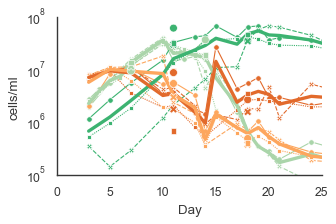

In [36]:
sns.relplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7, 5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='cells/ml', 
            style='replicate', 
            markers=True, 
            estimator=None, units='Sample',
            hue='group', markersize=5,
            #size='omics',
            hue_order=forder, palette=fpal,
            lw=1,
           kind='line', errorbar='sd',
            height=3, aspect=1.4,
            legend=False
           )
sns.lineplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7,5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='cells/ml', 
            hue='group', markersize=5,
            # estimator=None,
            hue_order=forder, palette=fpal, errorbar=None,
            lw=3,
            legend=False
           )
sns.scatterplot(data=fcm_df.loc[fcm_df.omics.isin([True])& (fcm_df.events > 40)]
            , x='Day', y='cells/ml', 
            hue_order=forder, palette=fpal,
            style='replicate', 
            hue='group', s=50,
                zorder=20,
                legend=False
           )

plt.xlim(0,25)
plt.ylim(1e5,1e8)

plt.yscale('log')

#plt.title('CC1A3 Culture FCM cell counts')

In [37]:
fcm_df.index, d3.index

(RangeIndex(start=0, stop=437, step=1),
 Index([   4,   11,   14,   19,   25,   30,   39,   43,   49,   59,
        ...
        1943, 1949, 1952, 1959, 1963, 1973, 1976, 1981, 1989, 1995],
       dtype='int64', length=333))

C:\Users\Osnat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


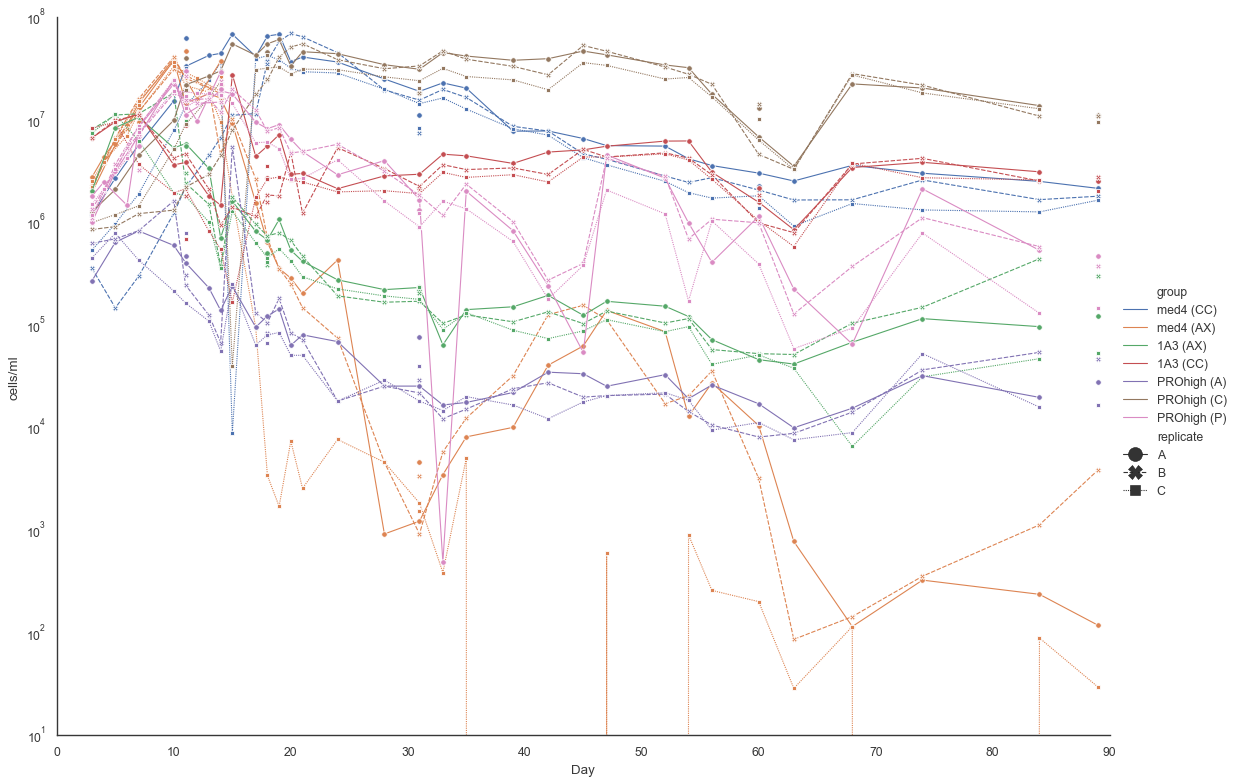

In [38]:
sns.relplot(data=pd.concat([fcm_df, d3]).reset_index()
            , x='Day', y='cells/ml', 
            style='replicate', 
            markers=True, 
            estimator=None, units='Sample',
            hue='group', markersize=5,
            #size='omics',
            #hue_order=forder, palette=fpal,
            lw=1,
           kind='line', ci='sd',
            height=10, aspect=1.4,
            #legend=False
           )
plt.yscale('log')

In [39]:
fcm_df.head()

,index,sample_id,condition,timepoint,replicate,Sample,Day,cells/ml,events,Strain,group,omics,log10(cells/ml)
0,0,C0A-d10,C,0,A,C0A,10,1.530643e+07,5120,med4,med4 (CC),False,7.184874
1,1,C0A-d11,C,0,A,C0A,11,3.311211e+07,11076,med4,med4 (CC),False,7.519987
2,2,C0A-d13,C,0,A,C0A,13,4.237369e+07,14174,med4,med4 (CC),False,7.627096
3,3,C0A-d14,C,0,A,C0A,14,4.435268e+07,15091,med4,med4 (CC),False,7.646920
4,4,C0A-d15,C,0,A,C0A,15,6.830272e+07,23240,med4,med4 (CC),False,7.834438


In [40]:
fcm_df['log cells/ml'] = np.log10(fcm_df['cells/ml'])

C:\Users\Osnat\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
fcm_df.loc[fcm_df.Day > 60].groupby(['group']) ['cells/ml'].agg(['mean', 'std'])

,mean,std
group,,
1A3 (AX),1.109953e+05,1.156464e+05
1A3 (CC),2.629984e+06,1.146653e+06
med4 (AX),4.928169e+02,9.785249e+02
med4 (CC),1.987555e+06,7.257921e+05


In [42]:
fcm_df.loc[fcm_df.group.isin(['1A3 (CC)'])].nsmallest(10, 'cells/ml')

,index,sample_id,condition,timepoint,replicate,Sample,Day,cells/ml,events,Strain,group,omics,log10(cells/ml),log cells/ml
396,997,C0C-d15-sybr,C,0,C,C0C,15,1.665015e+05,42,HOT1A3,1A3 (CC),False,5.221418,5.221418
395,992,C0C-d14-sybr,C,0,C,C0C,14,5.470763e+05,138,HOT1A3,1A3 (CC),False,5.738048,5.738048
417,1122,C0C-d63-sybr,C,0,C,C0C,63,5.813528e+05,159,HOT1A3,1A3 (CC),False,5.764440,5.764440
424,1167,C1C-d11-sybr,C,1,C,C1C,11,6.887160e+05,177,HOT1A3,1A3 (CC),True,5.838040,5.838040
387,943,C0B-d63-sybr,C,0,B,C0B,63,7.934186e+05,217,HOT1A3,1A3 (CC),False,5.899502,5.899502
394,984,C0C-d13-sybr,C,0,C,C0C,13,8.210117e+05,211,HOT1A3,1A3 (CC),False,5.914349,5.914349
357,763,C0A-d63-sybr,C,0,A,C0A,63,8.482633e+05,232,HOT1A3,1A3 (CC),False,5.928531,5.928531
365,812,C0B-d14-sybr,C,0,B,C0B,14,9.395441e+05,237,HOT1A3,1A3 (CC),False,5.972917,5.972917
386,937,C0B-d60-sybr,C,0,B,C0B,60,9.872029e+05,270,HOT1A3,1A3 (CC),False,5.994406,5.994406
416,1119,C0C-d60-sybr,C,0,C,C0C,60,1.038391e+06,284,HOT1A3,1A3 (CC),False,6.016361,6.016361


In [43]:
fcm_df.loc[fcm_df.group.isin(['1A3 (AX)'])].nsmallest(80, 'cells/ml')

,index,sample_id,condition,timepoint,replicate,Sample,Day,cells/ml,events,Strain,group,omics,log10(cells/ml),log cells/ml
316,520,A0C-d68-sybr,A,0,C,A0C,68,6.544790e+03,179,HOT1A3,1A3 (AX),False,3.815896,3.815896
318,531,A0C-d74-sybr,A,0,C,A0C,74,3.121718e+04,654,HOT1A3,1A3 (AX),False,4.494394,4.494394
315,510,A0C-d63-sybr,A,0,C,A0C,63,3.787934e+04,1036,HOT1A3,1A3 (AX),False,4.578402,4.578402
313,500,A0C-d56-sybr,A,0,C,A0C,56,4.127971e+04,1129,HOT1A3,1A3 (AX),False,4.615737,4.615737
255,151,A0A-d63-sybr,A,0,A,A0A,63,4.157221e+04,1137,HOT1A3,1A3 (AX),False,4.618803,4.618803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,31,A0A-d17-sybr,A,0,A,A0A,17,8.166501e+05,206,HOT1A3,1A3 (AX),False,5.912036,5.912036
265,215,A0B-d17-sybr,A,0,B,A0B,17,9.554014e+05,241,HOT1A3,1A3 (AX),False,5.980186,5.980186
292,372,A0C-d13-sybr,A,0,C,A0C,13,1.003891e+06,258,HOT1A3,1A3 (AX),False,6.001687,6.001687
237,42,A0A-d19-sybr,A,0,A,A0A,19,1.066386e+06,253,HOT1A3,1A3 (AX),False,6.027914,6.027914


C:\Users\Osnat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Osnat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'CC1A3 Culture FCM cell counts')

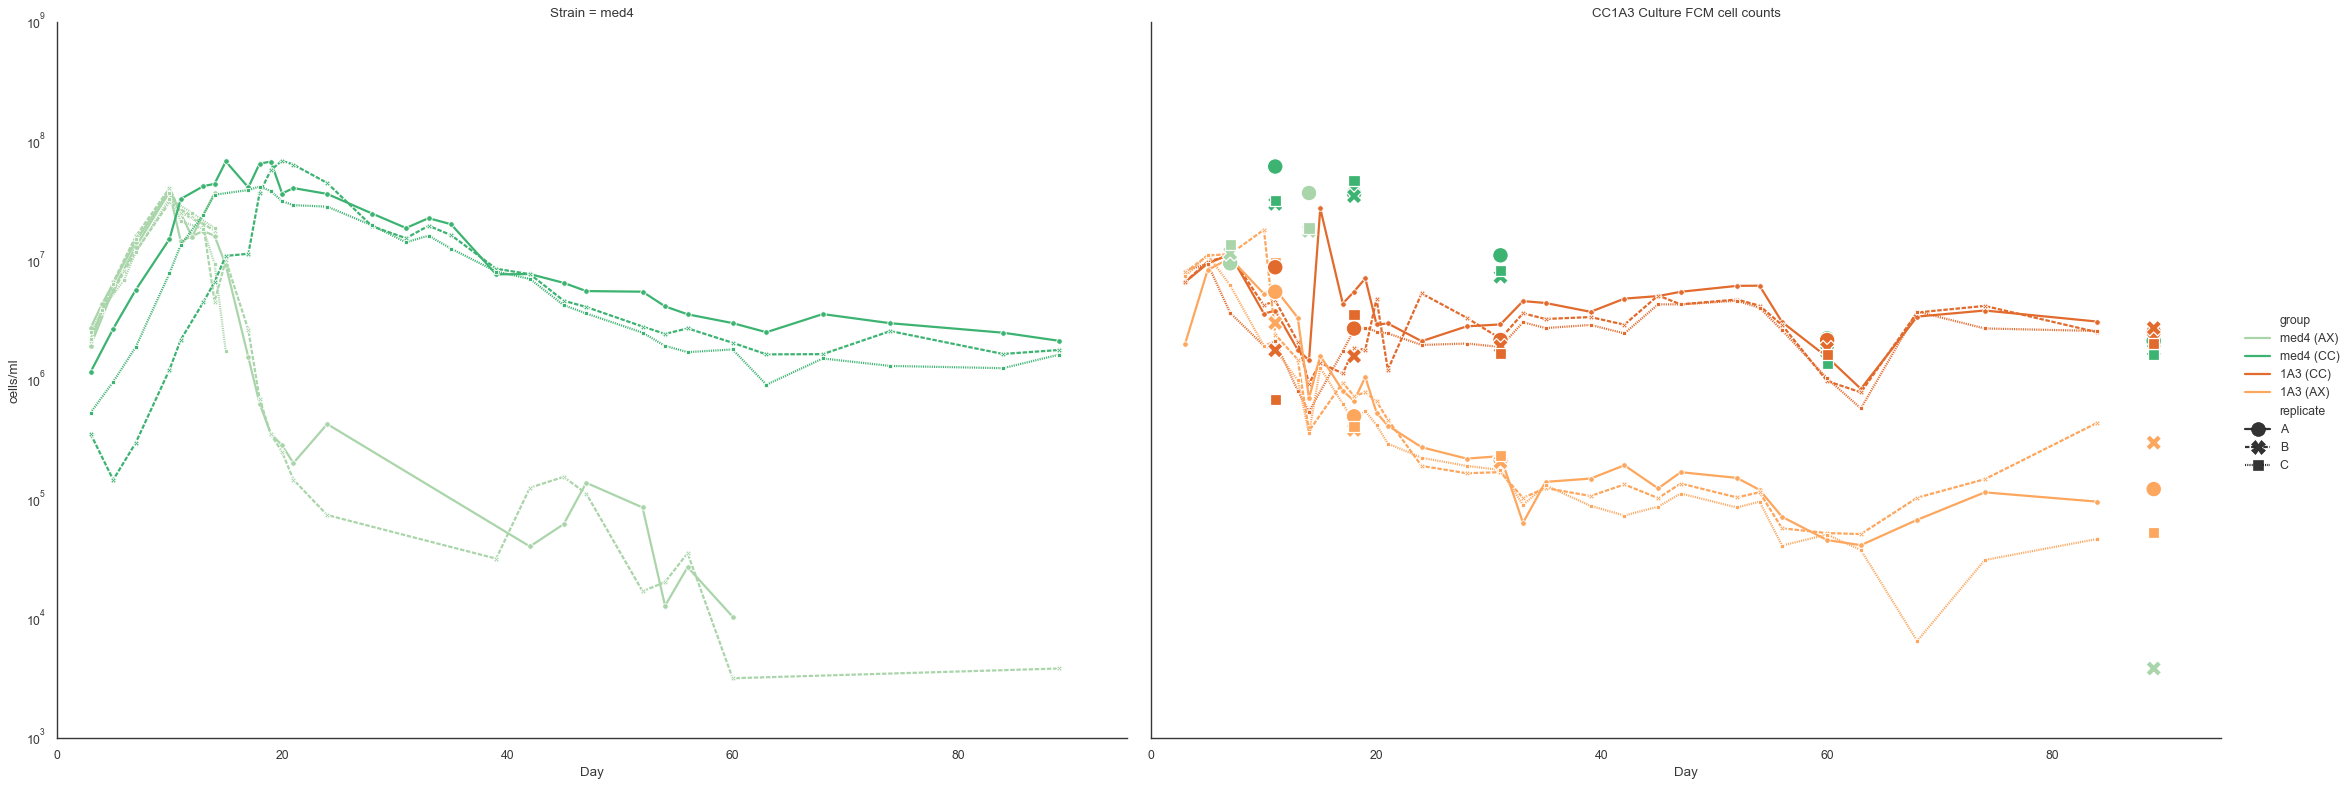

In [44]:

sns.relplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='cells/ml', 
            style='replicate', 
            markers=True, 
            estimator=None, units='Sample',
            hue='group', markersize=5,
            #size='omics',
            hue_order=forder, palette=fpal,
            lw=2,
           kind='line', ci='sd',
            height=10, aspect=1.4, col='Strain',
            #legend=False
           )
sns.scatterplot(data=fcm_df.loc[fcm_df.omics.isin([True])& (fcm_df.events > 40)]
            , x='Day', y='cells/ml', 
            hue_order=forder, palette=fpal,
            style='replicate', 
            hue='group', s=200,
                zorder=20,
                legend=False
           )

plt.xlim(0,95)
#plt.ylim(0,5)

plt.yscale('log')

plt.title('CC1A3 Culture FCM cell counts')

In [45]:
fcm_df.group.unique()

array(['med4 (CC)', 'med4 (AX)', '1A3 (AX)', '1A3 (CC)'], dtype=object)

In [46]:
fcm_df.loc[(fcm_df.Day > 60) & fcm_df.group.isin(['1A3 (CC)'])].nsmallest(10, 'cells/ml')

,index,sample_id,condition,timepoint,replicate,Sample,Day,cells/ml,events,Strain,group,omics,log10(cells/ml),log cells/ml
417,1122,C0C-d63-sybr,C,0,C,C0C,63,5.813528e+05,159,HOT1A3,1A3 (CC),False,5.764440,5.764440
387,943,C0B-d63-sybr,C,0,B,C0B,63,7.934186e+05,217,HOT1A3,1A3 (CC),False,5.899502,5.899502
357,763,C0A-d63-sybr,C,0,A,C0A,63,8.482633e+05,232,HOT1A3,1A3 (CC),False,5.928531,5.928531
436,1238,C5C-d89-sybr,C,5,C,C5C,89,2.038186e+06,427,HOT1A3,1A3 (CC),True,6.309244,6.309244
391,971,C0B-d84-sybr,C,0,B,C0B,84,2.529833e+06,530,HOT1A3,1A3 (CC),False,6.403092,6.403092
434,1226,C5A-d89-sybr,C,5,A,C5A,89,2.548926e+06,534,HOT1A3,1A3 (CC),True,6.406357,6.406357
421,1146,C0C-d84-sybr,C,0,C,C0C,84,2.591885e+06,543,HOT1A3,1A3 (CC),False,6.413616,6.413616
420,1140,C0C-d74-sybr,C,0,C,C0C,74,2.720764e+06,570,HOT1A3,1A3 (CC),False,6.434691,6.434691
435,1230,C5B-d89-sybr,C,5,B,C5B,89,2.739857e+06,574,HOT1A3,1A3 (CC),True,6.437728,6.437728
361,787,C0A-d84-sybr,C,0,A,C0A,84,3.107399e+06,651,HOT1A3,1A3 (CC),False,6.492397,6.492397


In [47]:
df

,day,Sample,treatment,timepoint,replicate,omics,FL
0,0.000000,A0A,1A3,0,A,False,0.085
1,0.000000,A0B,1A3,0,B,False,0.075
2,0.000000,A0C,1A3,0,C,False,0.113
3,0.000000,C0A,co-culture,0,A,False,0.138
4,0.000000,C0B,co-culture,0,B,False,0.146
...,...,...,...,...,...,...,...
484,83.788889,C0B,co-culture,0,B,False,0.175
485,83.788889,C0C,co-culture,0,C,False,0.138
486,83.788889,P0A,med4,0,A,False,0.086
487,83.788889,P0B,med4,0,B,False,0.067


In [48]:
fcm_df

,index,sample_id,condition,timepoint,replicate,Sample,Day,cells/ml,events,Strain,group,omics,log10(cells/ml),log cells/ml
0,0,C0A-d10,C,0,A,C0A,10,1.530643e+07,5120,med4,med4 (CC),False,7.184874,7.184874
1,1,C0A-d11,C,0,A,C0A,11,3.311211e+07,11076,med4,med4 (CC),False,7.519987,7.519987
2,2,C0A-d13,C,0,A,C0A,13,4.237369e+07,14174,med4,med4 (CC),False,7.627096,7.627096
3,3,C0A-d14,C,0,A,C0A,14,4.435268e+07,15091,med4,med4 (CC),False,7.646920,7.646920
4,4,C0A-d15,C,0,A,C0A,15,6.830272e+07,23240,med4,med4 (CC),False,7.834438,7.834438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,1214,C4B-d60-sybr,C,4,B,C4B,60,1.853748e+06,507,HOT1A3,1A3 (CC),True,6.268051,6.268051
433,1220,C4C-d60-sybr,C,4,C,C4C,60,1.659963e+06,454,HOT1A3,1A3 (CC),True,6.220099,6.220099
434,1226,C5A-d89-sybr,C,5,A,C5A,89,2.548926e+06,534,HOT1A3,1A3 (CC),True,6.406357,6.406357
435,1230,C5B-d89-sybr,C,5,B,C5B,89,2.739857e+06,574,HOT1A3,1A3 (CC),True,6.437728,6.437728


In [49]:
# fg -> umol 14 (N mulecular weight) * 1e-9 (fmol -> umol)
# switch to C biomass
Qp = 12.5  * 1e-9 / 14
Qh = 25  * 1e-9 / 14

Qp, Qh

(8.92857142857143e-10, 1.785714285714286e-09)

In [50]:
fcm_df['Q'] = fcm_df.Strain.map({
    'HOT1A3': Qh,
    'med4': Qp
})

In [51]:
fcm_df['ref_Bp'] = fcm_df['cells/ml']* fcm_df['Q'] * 1e3

In [52]:
fcm_df.columns

Index(['index', 'sample_id', 'condition', 'timepoint', 'replicate', 'Sample',
       'Day', 'cells/ml', 'events', 'Strain', 'group', 'omics',
       'log10(cells/ml)', 'log cells/ml', 'Q', 'ref_Bp'],
      dtype='object')

In [53]:
fcm_df.loc[fcm_df.timepoint.isin([5])].Sample

329    A5A
330    A5B
331    A5C
434    C5A
435    C5B
436    C5C
Name: Sample, dtype: object

In [54]:
fcm_df.Sample = fcm_df.Sample.str.replace('5', '0')

In [55]:
fcm_df.Day.nsmallest(3)

12    3
43    3
74    3
Name: Day, dtype: int64

In [56]:
#fcm_df.to_excel('CC1A3_cell_count.xlsx', index=False)

In [57]:
n_budget_df = fcm_df.loc[
    #(fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples)) #&
    #(fcm_df.omics | fcm_df.timepoint.isin([1,2]) )
].pivot(
    index=['condition', 'Day', 'Sample', ],
    columns= 'Strain',
    values=['events','cells/ml','ref_Bp',  ]

)

n_budget_df.columns = [' '.join(col).strip() for col in n_budget_df.columns.values]
n_budget_df.rename(columns={'ref_Bp HOT1A3' : 'N biomass HOT1A3', 'ref_Bp med4':'N biomass med4', }, inplace=True)
n_budget_df.reset_index().to_excel('CC1A3_N_budget.xlsx', index=False)

In [58]:
n_budget_df

events HOT1A3  events med4  cells/ml HOT1A3  \
condition Day Sample                                                
A         3   A0A             641.0          NaN     2.030087e+06   
              A0B            2534.0          NaN     8.025337e+06   
              A0C            2345.0          NaN     7.426762e+06   
          5   A0A            2651.0          NaN     8.395883e+06   
              A0B            3510.0          NaN     1.111639e+07   
...                             ...          ...              ...   
P         84  P0B               NaN         38.0              NaN   
              P0C               NaN          3.0              NaN   
          89  P0A               NaN          4.0              NaN   
              P0B               NaN        130.0              NaN   
              P0C               NaN          1.0              NaN   

                      cells/ml med4  N biomass HOT1A3  N biomass med4  
condition Day Sample                                                   
A         3   A0A               NaN          3.625156             NaN  
              A0B               NaN         14.330958             NaN  
              A0C               NaN         13.262074             NaN  
          5   A0A               NaN         14.992648             NaN  
              A0B               NaN         19.850696             NaN  
...                             ...               ...             ...  
P         84  P0B       1125.092524               NaN        0.001005  
              P0C         88.823094               NaN        0.000079  
          89  P0A        118.430792               NaN        0.000106  
              P0B       3849.000740               NaN        0.003437  
              P0C         29.607698               NaN        0.000026  

[328 rows x 6 columns]

In [59]:
# e ^ a t = 